In [1]:
#Packages and module imported
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import to_hex
import numpy as np

In [2]:
# Uploading the xlsx files with the metadata
from google.colab import drive
drive.mount('/content/drive')

metadata_NTs = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Metadata_ECHOES.xlsx')

print(metadata_NTs.columns)

Mounted at /content/drive
Index(['Informazioni cronologiche',
       'Nombre y apellidos del/la menor participante', 'Edad', 'Género',
       'Peso (kg)', 'Altura (cm)',
       'Por favor indique si el/la participante se ha quitado la pulsera de silicona durante la monitorización. (Indicar el número global de horas en las que ha realizado alguna actividad sin llevar puesta la pulsera)',
       '¿Qué tipo de ambientes exteriores ha sido el más frecuentado por el/la participante? (Puede seleccionar más de 1 opción)',
       '¿Qué tipo de ambientes interiores ha sido el más frecuentado por el/la participante? (Puede seleccionar más de 1 opción)',
       '¿Cómo realiza la mayoría de sus desplazamientos? (Puede seleccionar más de 1 opción)',
       'Indique en cuáles de las siguientes actividades ha llevado puesta la pulsera (Puede seleccionar más de 1 opción)',
       '¿Cuántos adultos viven en la vivienda habitual del/la participante? ',
       '¿Cuántos menores viven en la vivienda habit

# Metadata selection, organization and codification
In order to extract meaningful insights from the data recolected, I will select some of the metadata variables, I will encode them and afterwards I will join the columnns extracted and codified to the data_NTs dataframe.

Columns extracted:
1. Nombre y apellidos del/la menor participante
- Coded participant ID
2.  Género
- Gender of the participant
3. Peso (kg)
- Weight of the participant in kg
4. Altura (cm)
- Height of the participant in cm
5. ¿Algún habitante de la vivienda es fumador/a?
- Whether any household member is a smoker. This will allow me to classify the participants in no-TSE (if answer is no) or any other groups (if answer is yes)
6. En caso afirmativo, ¿cuántos/as fumadores/as hay en la vivienda?
- Number of smokers in the household
7. En caso de convivir con fumadores/as, ¿cuántos cigarrillos fuman al día dentro de la vivienda? (Indicar el promedio de cigarrillos diarios)
- Average number of cigarettes smoked per day inside the home
8. En caso de convivir con fumadores/as, ¿cuántos cigarrillos fuman al día fuera de la vivienda? (Indicar el promedio de cigarrillos diarios)
- Average number of cigarettes smoked per day outside the home
9. En caso de convivir con fumadores/as, ¿estos fuman en presencia del/la participante?
- If living with a smoker member, do they smoke in the child presence? This will allow me to classify the tobacco smoke exposed participants into thirdhand-smoke (THS) if they do not smoke in their presence or secondhand-smoke (SHS) if they do smoke in their presence
10. ¿El/la participante ha estado en otros ambientes interiores o exteriores en los que se haya fumado en su presencia?
- Whether the participant has been in other indoor or outdoor environments where smoking occurred in their presence. This will allow me to classify the participants in tobacco exposure outside (TSE-out)
11. ¿Cuántos días por semana consume fruta o verdura?
-Number of days per week the participant consumes fruit or vegetables
12. Cuántas piezas de fruta o verdura consume al día?
- Number of pieces of fruit or vegetables consumed per day
13. ¿Cree que la dieta del/la participante tiene un alto contenido en grasa? (Bollería industrial, embutidos, bacón, mantequilla, entre otros)
- Perception of whether the participant’s diet is high in fat
14. ¿Cuántos días por semana realiza una hora o más de ejercicio físico?
- Number of days each week that the participant spends at least an hour doing physical exercise.
15. Entorno en el que se ubica la vivienda habitual:
- Type of environment where the participant's habitual residence is located (urban, rural, etc.)
16. Estado civil
- Marital status of the guardian or parent
17. ¿Cuál es el nivel máximo de estudios finalizados del/la/los/as progenitor/a/es/as o tutor/a/es/as legal/es?
- Highest level of education completed by the participant's parent(s) or legal guardian(s).
18. ¿Nos podría indicar aproximadamente el rango global de ingresos mensuales familiares?
- The approximate range of the family's monthly income


This metadata will allow me to classify the participants in different groups depending on their tobbacco smoke exposure.

- Non-exposed: participants that have not been exposed to smoke
- Exposed-THS: participants that are exposed to smoke but the parents do not smoke in their presence (ThirdHand-Smoke)
- Exposed-SHS: participants that are exposed to smoke and the parents do smoke in their presence (SecondHand-Smoke)
- Exposed-out: participants that are exposed to smoke outside their house.


In [3]:
# Selecting the metadata columns from the dataframe
selected_columns = [
    'Nombre y apellidos del/la menor participante',
    'Género',
    'Peso (kg)',
    'Altura (cm)',
    '¿Algún habitante de la vivienda es fumador/a?',
    'En caso afirmativo, ¿cuántos/as fumadores/as hay en la vivienda?',
    'En caso de convivir con fumadores/as, ¿cuántos cigarrillos fuman al día dentro de la vivienda? (Indicar el promedio de cigarrillos diarios)',
    'En caso de convivir con fumadores/as, ¿cuántos cigarrillos fuman al día fuera de la vivienda? (Indicar el promedio de cigarrillos diarios)',
    'En caso de convivir con fumadores/as, ¿estos fuman en presencia del/la participante?',
    '¿El/la participante ha estado en otros ambientes interiores o exteriores en los que se haya fumado en su presencia?',
    '¿Cuántos días por semana consume fruta o verdura?',
    '¿Cuántas piezas de fruta o verdura consume al día?',
    '¿Cree que la dieta del/la participante tiene un alto contenido en grasa? (Bollería industrial, embutidos, bacón, mantequilla, entre otros)',
    '¿Cuántos días por semana realiza una hora o más de ejercicio físico?',
    'Entorno en el que se ubica la vivienda habitual:',
    'Estado civil',
    '¿Cuál es el nivel máximo de estudios finalizados del/la/los/as progenitor/a/es/as o tutor/a/es/as legal/es?',
    '¿Nos podría indicar aproximadamente el rango global de ingresos mensuales familiares?']

metadata = metadata_NTs[selected_columns]

# Renaming the variables to shorten them
metadata = metadata.rename(columns={
    'Nombre y apellidos del/la menor participante': 'ID',
    'Género': 'Gender',
    'Peso (kg)': 'Weight_kg',
    'Altura (cm)': 'Height_cm',
    '¿Algún habitante de la vivienda es fumador/a?': 'Smoker_home',
    'En caso afirmativo, ¿cuántos/as fumadores/as hay en la vivienda?': 'Smokers_in_home',
    'En caso de convivir con fumadores/as, ¿cuántos cigarrillos fuman al día dentro de la vivienda? (Indicar el promedio de cigarrillos diarios)': 'Cigarettes_in_home',
    'En caso de convivir con fumadores/as, ¿cuántos cigarrillos fuman al día fuera de la vivienda? (Indicar el promedio de cigarrillos diarios)': 'Cigarettes_outside_home',
    'En caso de convivir con fumadores/as, ¿estos fuman en presencia del/la participante?': 'Smoke_presence',
    '¿El/la participante ha estado en otros ambientes interiores o exteriores en los que se haya fumado en su presencia?': 'Smoke_outside',
    '¿Cuántos días por semana consume fruta o verdura?': 'Fruit_veg_days',
    '¿Cuántas piezas de fruta o verdura consume al día?': 'Fruit_veg_per_day',
    '¿Cree que la dieta del/la participante tiene un alto contenido en grasa? (Bollería industrial, embutidos, bacón, mantequilla, entre otros)': 'High_fat_diet',
    '¿Cuántos días por semana realiza una hora o más de ejercicio físico?': 'Exercise_days',
    'Entorno en el que se ubica la vivienda habitual:': 'Env_type',
    'Estado civil': 'Parents_liv_tog',
    '¿Cuál es el nivel máximo de estudios finalizados del/la/los/as progenitor/a/es/as o tutor/a/es/as legal/es?': 'Parents_edu',
    '¿Nos podría indicar aproximadamente el rango global de ingresos mensuales familiares?': 'Income'})

print(metadata.head(3))
print(metadata.columns)

      ID     Gender Weight_kg Height_cm Smoker_home  Smokers_in_home  \
0  EC002  Masculino        36       146          No              NaN   
1  EC003  Masculino        31       133          No              NaN   
2  EC004   Femenino        25       130          Sí              1.0   

  Cigarettes_in_home Cigarettes_outside_home Smoke_presence Smoke_outside  \
0                NaN                     NaN            NaN            No   
1                NaN                     NaN            NaN            Sí   
2                  0                      10             Sí            No   

  Fruit_veg_days Fruit_veg_per_day  High_fat_diet Exercise_days  \
0              4         1 o menos              2             2   
1        6 o más         1 o menos              6             4   
2              3                 2              4             2   

                                 Env_type         Parents_liv_tog  \
0  Residencial (ej. urbanización, pueblo)  Casado/a, emparejado/

# PREPROCESSING METADATA ANALYSIS
Before proceeding with any analysis, it is important to look at what type of variable are the data. After that, I will convert the categorical variables with numerical information, such as Exercise_days and Income, into actual numerical data types. The column Exercise_days includes an option "5 or more days", which will be converted to 5.5 to represent an average beyond 5 days. For the Income column, where ranges like "Between X and Y amount" are used, the approach will be to replace each range with the mean value of that range.

Another challenge is to extract information about the parents education. I will create a new column named Same_edu that will indicate if both parents (if there are 2), have similar levels of education or not. The original Parents_edu will be transformed into High, Medium or Low education level depending on what is the highest education level between one or another partner.

After that, it is important to create the labels of the samples to be able to impute the missing values on other variables. The different groups are Non-Exposed (No_TSE), Exposed-THS (THS), Exposed-SHS (SHS) and Exposed-outside(TSE_out). The variables that will allow me to classify the samples are:

- Smoker_home: if 'No' the sample can be catalogued into No_TSE or TSE-out depending on Smoke_outside.
- Smoke_presence: if Smoker_home was 'No', this variable will be empty but if was 'Yes' it will allow to categorize the samples between SHS if the Smoke_presence is 'Si' or THS if the Smoke_presence is 'No'.
-Smoke_outside: if Smoker_home was 'No', the sample can be categorized either as TSE-out if Smoke_outside is 'Si' or No_TSE if Smoke_outside is 'No'.

Another important step is to encode the variables in order to use them in the machine learning phase. The LabelEncoder() function will automatically do this and it is very useful when dealing with many unique values to categorize (not this particular case). The one problem are the NA values because they can't fit in LabelEncoder. To solve this problem, I will substitute the missing values for "zz_missing" to get the NAs categorized all together in the last value because it is alphabetically encoded. After encoding the variables (and the missing values) I will replace again the "zz_missing" for NA values in order to impute the values using KNN imputing method.

To decide what is the best n_neighbors value I will use The Elbow Method, evaluating the performance of KNN imputation for different values of n_neighbors and then selecting the optimal number based on the MSE error metrics. Once selected the best-suited n_neighbors, I will compute the KNN imputer algorithm on the metadata and fill the NA values.

To see the metadata preprocessing effects and mitigate possible errors induced by it, the next step is visualization of the data. Grouped Bar charts are for categorical variables encoded and Boxplots and Density plots are for numerical variables. Another way to check the effects of imputations is to compare correlations matrix.

To represent the variables and their connection a Mixed Graphical Model will be used to see spatially how the variables are connected and their internal dependencies.



In [4]:
# The datatype of each variable
print(metadata.dtypes)

ID                          object
Gender                      object
Weight_kg                   object
Height_cm                   object
Smoker_home                 object
Smokers_in_home            float64
Cigarettes_in_home          object
Cigarettes_outside_home     object
Smoke_presence              object
Smoke_outside               object
Fruit_veg_days              object
Fruit_veg_per_day           object
High_fat_diet                int64
Exercise_days               object
Env_type                    object
Parents_liv_tog             object
Parents_edu                 object
Income                      object
dtype: object


In [5]:
# Replacing the categorical responses to numerical values
metadata['Exercise_days'] = metadata['Exercise_days'].replace({'5 o más': 5.5, '1 o menos': 0.5}).astype(float)
metadata['Income'] = metadata['Income'].replace({'Menos de 1.000€': 500, 'Entre 1.000 y 2.000€': 1500,'Entre 2.000 y 3.000€': 2500, 'Entre 3.000 y 4.000€': 3500, 'Más de 4.000€': 4500}).astype(float)
metadata['Fruit_veg_days'] = metadata['Fruit_veg_days'].replace({'6 o más': 6, '1 o menos': 1}).astype(float)
metadata['Fruit_veg_per_day'] = metadata['Fruit_veg_per_day'].replace({'4 o más': 4, '1 o menos': 1}).astype(float)

# Substituting values in Parents_liv_tog becasue of unbalanced classes
#print(metadata['Parents_liv_tog'].value_counts())
metadata['Parents_liv_tog'] = metadata['Parents_liv_tog'].apply(lambda x: 'No casado' if x not in ['Casado/a, emparejado/a'] else x)
print(metadata['Parents_liv_tog'].value_counts())

#print(metadata['Income'].head())
#print(metadata['Exercise_days'].head())

Parents_liv_tog
Casado/a, emparejado/a    169
No casado                  46
Name: count, dtype: int64


<ipython-input-5-d90574d53295>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metadata['Exercise_days'] = metadata['Exercise_days'].replace({'5 o más': 5.5, '1 o menos': 0.5}).astype(float)
<ipython-input-5-d90574d53295>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metadata['Income'] = metadata['Income'].replace({'Menos de 1.000€': 500, 'Entre 1.000 y 2.000€': 1500,'Entre 2.000 y 3.000€': 2500, 'Entre 3.000 y 4.000€': 3500, 'Más de 4.000€': 4500}).astype(float)
<ipython-input-5-d90574d53295>:4: FutureWarning: Downcasting beh

In [6]:
# Replacing with 0 the NA values of the Cigarretes_in_home and Cigarretes_outside_home variables
metadata['Cigarettes_in_home'] = metadata['Cigarettes_in_home'].fillna(0)
metadata['Cigarettes_outside_home'] = metadata['Cigarettes_outside_home'].fillna(0)
metadata['Smokers_in_home'] = metadata['Smokers_in_home'].fillna(0)


print(metadata.isnull().sum())

ID                           0
Gender                       1
Weight_kg                    0
Height_cm                    0
Smoker_home                  0
Smokers_in_home              0
Cigarettes_in_home           0
Cigarettes_outside_home      0
Smoke_presence             146
Smoke_outside                0
Fruit_veg_days               2
Fruit_veg_per_day            1
High_fat_diet                0
Exercise_days                0
Env_type                     1
Parents_liv_tog              0
Parents_edu                  1
Income                      19
dtype: int64


In [7]:
# Transforming numerical variables that are imported as objects
def convert_columns_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

columns_to_convert = [
    'Smokers_in_home',
    'Cigarettes_in_home',
    'Cigarettes_outside_home',
    'Weight_kg',
    'Height_cm',
    'Exercise_days',
    'Income']

metadata = convert_columns_to_numeric(metadata, columns_to_convert)

# Creating an IMC variable
metadata['BMI'] = round(metadata['Weight_kg'] / ((metadata['Height_cm'] / 100) ** 2),2)

print(metadata.dtypes)

ID                          object
Gender                      object
Weight_kg                  float64
Height_cm                  float64
Smoker_home                 object
Smokers_in_home            float64
Cigarettes_in_home         float64
Cigarettes_outside_home    float64
Smoke_presence              object
Smoke_outside               object
Fruit_veg_days             float64
Fruit_veg_per_day          float64
High_fat_diet                int64
Exercise_days              float64
Env_type                    object
Parents_liv_tog             object
Parents_edu                 object
Income                     float64
BMI                        float64
dtype: object


In [8]:
# Create a duplicate of PArents_edu named Same_edu
metadata['Same_edu'] = metadata['Parents_edu']

# Define education levels
education_levels = {
    'High': ['Estudios universitarios de segundo ciclo: licenciatura, arquitectura e ingeniería',
             'Estudios universitarios de doctorado, postgrado, máster, MIR o equivalente',
             'Estudios universitarios de primer ciclo: diplomatura universitaria, arquitectura e ingeniería técnica'],
    'Medium': ['FP de grado superior: maestría industrial, FPII, ciclos formativos de grado superior',
               'Estudios de bachillerato: bachillerato superior, BUP, bachillerato plan nuevo, PREU o COU'],
    'Low': ['Educación secundaria obligatoria (ESO)',
            'FP de grado medio: oficialía industrial, FPI, ciclos formativos de grado medio',
            'Estudios primarios completos: primaria, EGB, graduado escolar',
            'Estudios primarios incompletos, 6º de EGB, ingreso o similar']}

metadata['Parents_edu'] = metadata['Parents_edu'].astype(str)

def classify_education(edu_string):
    # High level first
    if any(level in edu_string for level in education_levels['High']):
        return 'High'
    # Medium level if High is not present
    elif any(level in edu_string for level in education_levels['Medium']):
        return 'Medium'
    # Low level if neither High nor Medium are present
    elif any(level in edu_string for level in education_levels['Low']):
        return 'Low'
    # For NA values
    else:
        return np.nan

# Apply the classification function to the Parents_edu column
metadata['Parents_edu'] = metadata['Parents_edu'].apply(classify_education)

# Look how many unique values has now Parents_edu
print(metadata['Parents_edu'].unique())

#metadata.to_excel('/content/drive/My Drive/Alberto Constantino Puscasu/metadata_processed.xlsx', index=False)


['Medium' 'High' 'Low' nan]


In [9]:
# Defining a funtion that classifies both parents education
metadata['Same_edu'] = metadata['Same_edu'].astype(str)

def same_education(edu_string):
    # Counters for each education level
    high_count = sum(1 for level in education_levels['High'] if level in edu_string)
    medium_count = sum(1 for level in education_levels['Medium'] if level in edu_string)
    low_count = sum(1 for level in education_levels['Low'] if level in edu_string)

    # Verify how many High, Medium and Low strings there are
    if high_count == 2:
        return 'Same_education'
    elif medium_count == 2:
        return 'Same_education'
    elif low_count == 2:
        return 'Same_education'
    elif high_count == 1 and medium_count == 0 and low_count == 0:
        return 'Single_parent'
    elif high_count == 0 and medium_count == 1 and low_count == 0:
        return 'Single_parent'
    elif high_count == 0 and medium_count == 0 and low_count == 1:
        return 'Single_parent'
    elif high_count + medium_count + low_count > 1:
        return 'Diff_education'
    else:
        return np.nan

metadata['Same_edu'] = metadata['Same_edu'].apply(same_education)

print(metadata['Same_edu'].value_counts())

Same_edu
Single_parent     102
Diff_education     67
Same_education     45
Name: count, dtype: int64


In [10]:
# Defining the function to classify the samples
def classify_sample(row):
    if row['Smoker_home'] == 'No':
        if row['Smoke_outside'] == 'Sí':
            return 'TSE_out'  # Exposed to smoke outside
        else:
            return 'No_TSE'  # Not exposed at all

    elif row['Smoker_home'] == 'Sí':
        if row['Smoke_presence'] == 'Sí':
            return 'SHS'  # Secondhand smoke
        else:
            return 'THS'  # Thirdhand smoke

# Applying the function to classify the samples
metadata['Exposure_Group'] = metadata.apply(classify_sample, axis=1)

# Moving the exposure column to the second position and dropping the initial variables
exposure_group = metadata.pop('Exposure_Group')
metadata.insert(1, 'Exposure_Group', exposure_group)

metadata = metadata.drop(['Smoke_outside', 'Smoker_home', 'Smoke_presence'], axis=1)

print(metadata.head())

      ID Exposure_Group     Gender  Weight_kg  Height_cm  Smokers_in_home  \
0  EC002         No_TSE  Masculino       36.0      146.0              0.0   
1  EC003        TSE_out  Masculino       31.0      133.0              0.0   
2  EC004            SHS   Femenino       25.0      130.0              1.0   
3  EC005         No_TSE   Femenino       36.0      142.0              0.0   
4  EC006         No_TSE  Masculino       28.0      141.0              0.0   

   Cigarettes_in_home  Cigarettes_outside_home  Fruit_veg_days  \
0                 0.0                      0.0             4.0   
1                 0.0                      0.0             6.0   
2                 0.0                     10.0             3.0   
3                 0.0                      0.0             6.0   
4                 0.0                      0.0             6.0   

   Fruit_veg_per_day  High_fat_diet  Exercise_days  \
0                1.0              2            2.0   
1                1.0            

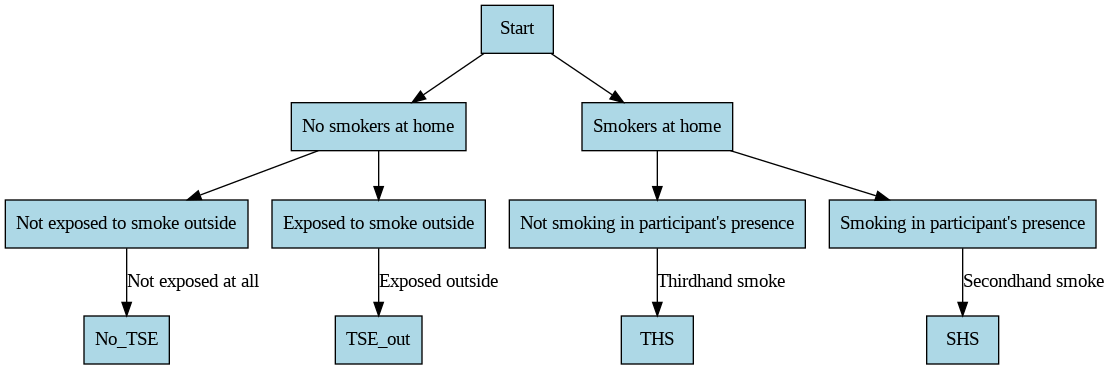

In [11]:
import graphviz

# Create a graph, defining nodes and edges
graph = graphviz.Digraph()

# Define node styles
node_style = {'shape': 'box', 'style': 'filled', 'fillcolor': 'lightblue'}

graph.node('start', 'Start', **node_style)
graph.node('smoker_home_no', 'No smokers at home', **node_style)
graph.node('smoker_home_yes', 'Smokers at home', **node_style)
graph.node('smoke_outside_no', 'Not exposed to smoke outside', **node_style)
graph.node('smoke_outside_yes', 'Exposed to smoke outside', **node_style)
graph.node('smoke_presence_no', "Not smoking in participant's presence", **node_style)
graph.node('smoke_presence_yes', "Smoking in participant's presence", **node_style)
graph.node('tse_out', 'TSE_out', **node_style)
graph.node('no_tse', 'No_TSE', **node_style)
graph.node('shs', 'SHS', **node_style)
graph.node('ths', 'THS', **node_style)

# Define edge styles
edge_style = {'arrowhead': 'normal', 'arrowtail': 'normal', 'dir': 'forward'}

graph.edge('start', 'smoker_home_no', **edge_style)
graph.edge('start', 'smoker_home_yes', **edge_style)
graph.edge('smoker_home_no', 'smoke_outside_yes', **edge_style)
graph.edge('smoker_home_no', 'smoke_outside_no', **edge_style)
graph.edge('smoke_outside_yes', 'tse_out', label='Exposed outside', **edge_style)
graph.edge('smoke_outside_no', 'no_tse', label='Not exposed at all', **edge_style)
graph.edge('smoker_home_yes', 'smoke_presence_yes', **edge_style)
graph.edge('smoker_home_yes', 'smoke_presence_no', **edge_style)
graph.edge('smoke_presence_yes', 'shs', label='Secondhand smoke', **edge_style)
graph.edge('smoke_presence_no', 'ths', label='Thirdhand smoke', **edge_style)

# Rendering the graph
graph.render('decision_diagram', format='png')
from IPython.display import Image
Image(filename='decision_diagram.png')

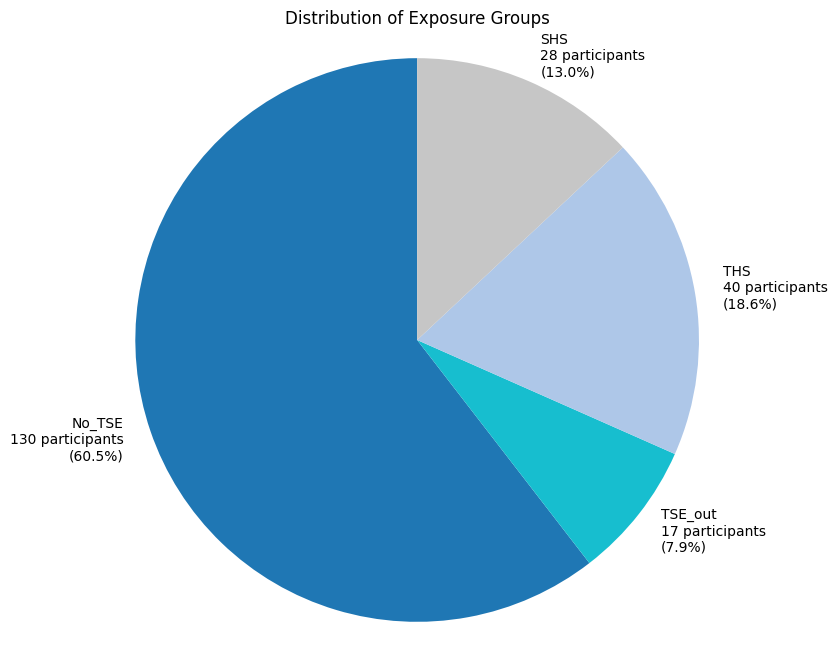

In [12]:
exposure_counts = metadata['Exposure_Group'].value_counts().reindex(['No_TSE', 'TSE_out', 'THS', 'SHS'])
exposure_percentages = exposure_counts / exposure_counts.sum() * 100

# Create labels with both the count and percentage
labels = [f'{group}\n{int(count)} participants\n({percent:.1f}%)' for group, count, percent in zip(exposure_counts.index, exposure_counts, exposure_percentages)]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(exposure_counts, labels=labels, autopct='', startangle=90, colors=['#1f77b4', '#17becf', '#aec7e8', '#c6c6c6'])

plt.title('Distribution of Exposure Groups')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

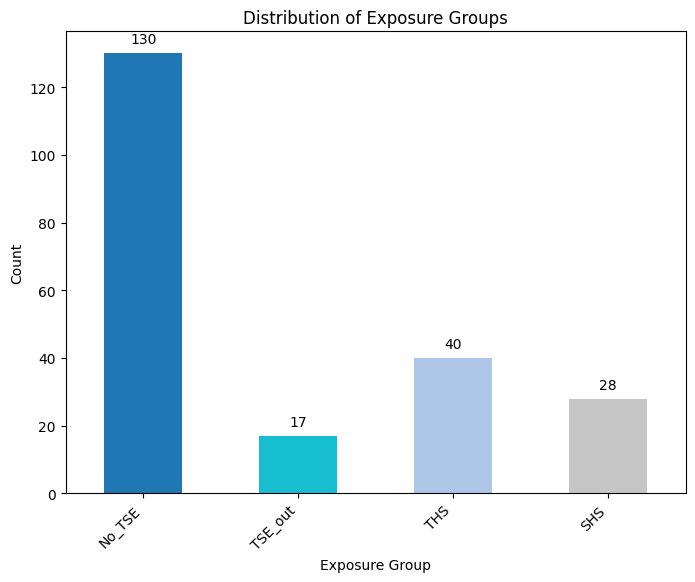

In [13]:
# Bar plot with the Exposure_Group distribution
exposure_counts = metadata['Exposure_Group'].value_counts().reindex(['No_TSE', 'TSE_out', 'THS', 'SHS'])
plt.figure(figsize=(8, 6))
ax = exposure_counts.plot(kind='bar', color=['#1f77b4', '#17becf', '#aec7e8', '#c6c6c6'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(height)), (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Exposure Group')
plt.ylabel('Count')
plt.title('Distribution of Exposure Groups')
ax.set_xticks(range(len(exposure_counts.index)))
ax.set_xticklabels(exposure_counts.index, rotation=45, ha='right')

plt.show()

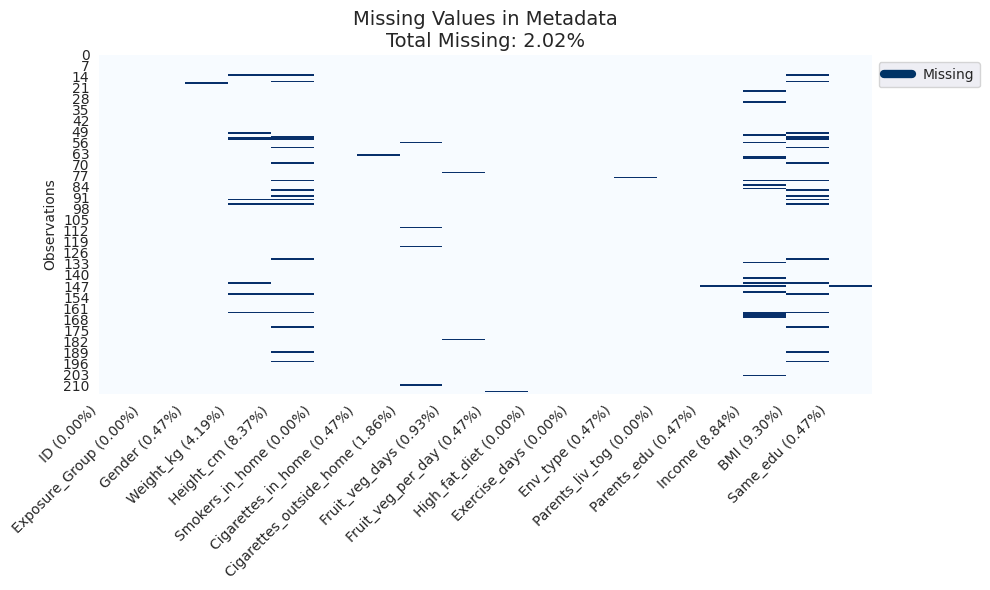

In [14]:
na_percentages = (metadata.isnull().sum() / len(metadata)) * 100
total_missing_percentage = (metadata.isnull().sum().sum() / (len(metadata) * len(metadata.columns))) * 100

# Create a list of variable names with the percentage of NA values
variable_names = [f"{var} ({na_percentages[var]:.2f}%)" for var in metadata.columns]

# Create the heatmap
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.heatmap(metadata.isnull(), cbar=False, cmap='Blues')
plt.title(f'Missing Values in Metadata\nTotal Missing: {total_missing_percentage:.2f}%', fontsize=14)
plt.ylabel('Observations')
plt.xticks(rotation=45, ha='right')

# Add the variable names with the percentage of NA values
plt.xticks(range(len(variable_names)), variable_names, rotation=45, ha='right')

# Create a legend for missing values
legend_elements = [Line2D([0], [0], color='#003366', lw=6, label='Missing')]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
# Substitute  NA values
metadata['Gender'] = metadata['Gender'].fillna('zz_missing')
metadata['Parents_liv_tog'] = metadata['Parents_liv_tog'].fillna('zz_missing')
metadata['Env_type'] = metadata['Env_type'].fillna('zz_missing')
metadata['Parents_edu'] = metadata['Parents_edu'].fillna('zz_missing')
metadata['Same_edu'] = metadata['Same_edu'].fillna('zz_missing')

#print(metadata.isnull().sum()) # There are no NA values on categorical data


# Encoding with LabelEncoder all the categorical variables
label_encoder = LabelEncoder()
def create_coded_label(df, column_name):
    encoder = LabelEncoder()

    encoded_labels = encoder.fit_transform(df[column_name])
    label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

    print(f"Mapping for {column_name}:")
    for original, encoded in sorted(label_mapping.items(), key=lambda x: x[1]):
        print(f"Original: {original} -> Coded: {encoded}")
    print("\n")

    df[column_name] = encoded_labels # Replace the old label with the encoded one

    return encoder

encoders = {}
for col in ['Gender', 'Env_type', 'Parents_edu', 'Exposure_Group', 'Parents_liv_tog', 'Same_edu']:
    encoders[col] = create_coded_label(metadata, col)

# Checking the reusults
for col in metadata.columns:
  print(f'{col}: {metadata[col].unique()}')

Mapping for Gender:
Original: Femenino -> Coded: 0
Original: Masculino -> Coded: 1
Original: zz_missing -> Coded: 2


Mapping for Env_type:
Original: Residencial (ej. urbanización, pueblo) -> Coded: 0
Original: Rural (ej. masía) -> Coded: 1
Original: Urbano (ej. ciudad, barrio) -> Coded: 2
Original: zz_missing -> Coded: 3


Mapping for Parents_edu:
Original: High -> Coded: 0
Original: Low -> Coded: 1
Original: Medium -> Coded: 2
Original: zz_missing -> Coded: 3


Mapping for Exposure_Group:
Original: No_TSE -> Coded: 0
Original: SHS -> Coded: 1
Original: THS -> Coded: 2
Original: TSE_out -> Coded: 3


Mapping for Parents_liv_tog:
Original: Casado/a, emparejado/a -> Coded: 0
Original: No casado -> Coded: 1


Mapping for Same_edu:
Original: Diff_education -> Coded: 0
Original: Same_education -> Coded: 1
Original: Single_parent -> Coded: 2
Original: zz_missing -> Coded: 3


ID: ['EC002' 'EC003' 'EC004' 'EC005' 'EC006' 'EC008' 'EC010' 'EC011' 'EC012'
 'EC013' 'EC014' 'EC015' 'EC018' 'EC019

In [16]:
# Replacing the encoded value "zz_missing" to NA values to be able to impute the value
def replace_zz_missing_with_nan(df, column_name, missing_code):
    df[column_name] = df[column_name].replace(missing_code, np.nan)

replace_zz_missing_with_nan(metadata, 'Parents_edu', 3)
replace_zz_missing_with_nan(metadata, 'Gender', 2)
replace_zz_missing_with_nan(metadata, 'Env_type', 3)
replace_zz_missing_with_nan(metadata, 'Same_edu', 3)

# Checking the reusults
for col in metadata.columns:
  print(f'{col}: {metadata[col].unique()}')

ID: ['EC002' 'EC003' 'EC004' 'EC005' 'EC006' 'EC008' 'EC010' 'EC011' 'EC012'
 'EC013' 'EC014' 'EC015' 'EC018' 'EC019' 'EC021' 'EC022' 'EC023' 'EC024'
 'EC026' 'EC027' 'EC028' 'EC029' 'EC030' 'EC031' 'EC032' 'EC033' 'EC034'
 'EC035' 'EC036' 'EC037' 'EC038' 'EC039' 'EC040' 'EC041' 'EC042' 'EC044'
 'EC045' 'EC046' 'EC047' 'EC048' 'EC049' 'EC050' 'EC051' 'EC052' 'EC053'
 'EC054' 'EC055' 'EC056' 'EC057' 'EC058' 'EC059' 'EC060' 'EC061' 'EC062'
 'EC063' 'EC064' 'EC065' 'EC066' 'EC067' 'EC068' 'EC069' 'EC070' 'EC071'
 'EC072' 'EC073' 'EC074' 'EC075' 'EC076' 'EC078' 'EC079' 'EC080' 'EC081'
 'EC082' 'EC083' 'EC084' 'EC085' 'EC086' 'EC087' 'EC088' 'EC089' 'EC090'
 'EC091' 'EC092' 'EC093' 'EC094' 'EC095' 'EC096' 'EC097' 'EC098' 'EC099'
 'EC101' 'EC102' 'EC103' 'EC106' 'EC107' 'EC109' 'EC111' 'EC112' 'EC113'
 'EC114' 'EC115' 'EC117' 'EC119' 'EC120' 'EC121' 'EC125' 'EC126' 'EC127'
 'EC132' 'EC136' 'EC140' 'EC142' 'EC148' 'EC152' 'EC153' 'EC159' 'EC154'
 'EC155' 'EC156' 'EC157' 'EC158' 'EC160' 'EC161

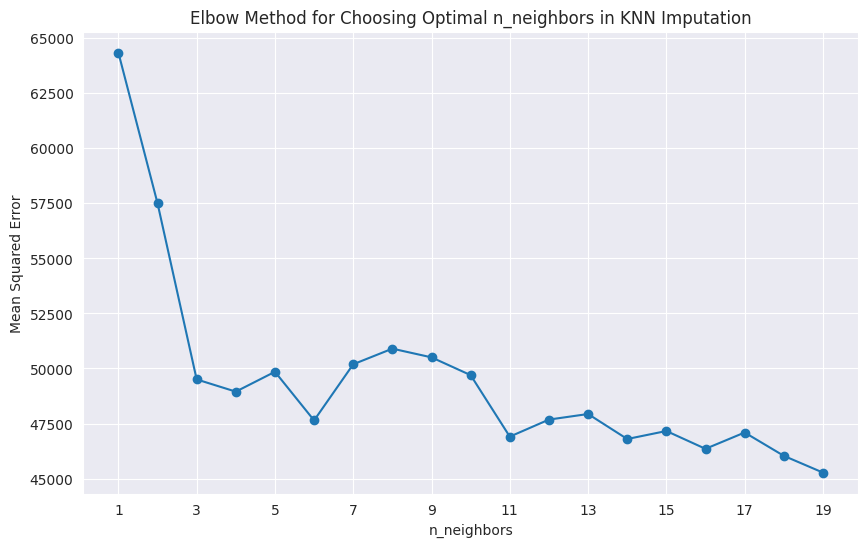

In [17]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

metadata_numeric = metadata.select_dtypes(include=['int64', 'float64']).columns
rs = 42

# Split the data into training and testing sets
train_metadata, test_metadata = train_test_split(metadata_numeric, test_size=0.2, random_state=rs)

n_neighbors_list = range(1, 20)
errors = []

# Loop over different n_neighbors values, training the imputer with the train data and imputing the test data
for n_neighbors in n_neighbors_list:
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = imputer.fit_transform(metadata[metadata_numeric].values)
    error = mean_squared_error(metadata[metadata_numeric].fillna(0), imputed_data)
    errors.append(error)

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, errors, marker='o')
plt.title("Elbow Method for Choosing Optimal n_neighbors in KNN Imputation")
plt.xlabel("n_neighbors")
plt.ylabel("Mean Squared Error")
plt.xticks(np.arange(min(n_neighbors_list), max(n_neighbors_list) + 1, 2))
plt.show()

In [18]:
# Imputing the missing values with n_neighbors = 6
imputer = KNNImputer(n_neighbors=6)
imputed_data = imputer.fit_transform(metadata[metadata_numeric])

# Replacing the imputed values into the metadata
metadata_imputed = pd.DataFrame(metadata)
metadata_imputed[metadata_numeric] = imputed_data

# Rounding to integers the imputed values
categorical_columns = ['Gender', 'Weight_kg', 'Height_cm', 'Cigarettes_in_home', 'Cigarettes_outside_home', 'Fruit_veg_days', 'Fruit_veg_per_day',  'Env_type', 'Parents_edu', 'Same_edu']
metadata_imputed[categorical_columns] = metadata_imputed[categorical_columns].round().astype(int)
metadata_imputed['BMI'] = round(metadata_imputed['BMI'], 2)
round_values_Income = [500, 1500, 2500, 3500, 4500]
def round_to_nearest(value):
    return min(round_values_Income, key=lambda x: abs(x - value))
metadata['Income'] = metadata['Income'].apply(round_to_nearest)
print(metadata_imputed['Income'].unique())
print(metadata_imputed.isnull().sum())

metadata_imputed.to_excel('/content/drive/My Drive/Alberto Constantino Puscasu/metadata_statistics_D1_1.xlsx', index=False)

[1500.         4500.         3500.         2500.         3333.33333333
 3666.66666667 2833.33333333  500.         3000.         4000.
 3166.66666667 2000.         2333.33333333]
ID                         0
Exposure_Group             0
Gender                     0
Weight_kg                  0
Height_cm                  0
Smokers_in_home            0
Cigarettes_in_home         0
Cigarettes_outside_home    0
Fruit_veg_days             0
Fruit_veg_per_day          0
High_fat_diet              0
Exercise_days              0
Env_type                   0
Parents_liv_tog            0
Parents_edu                0
Income                     0
BMI                        0
Same_edu                   0
dtype: int64


<ipython-input-19-abd7540d6b0b>:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


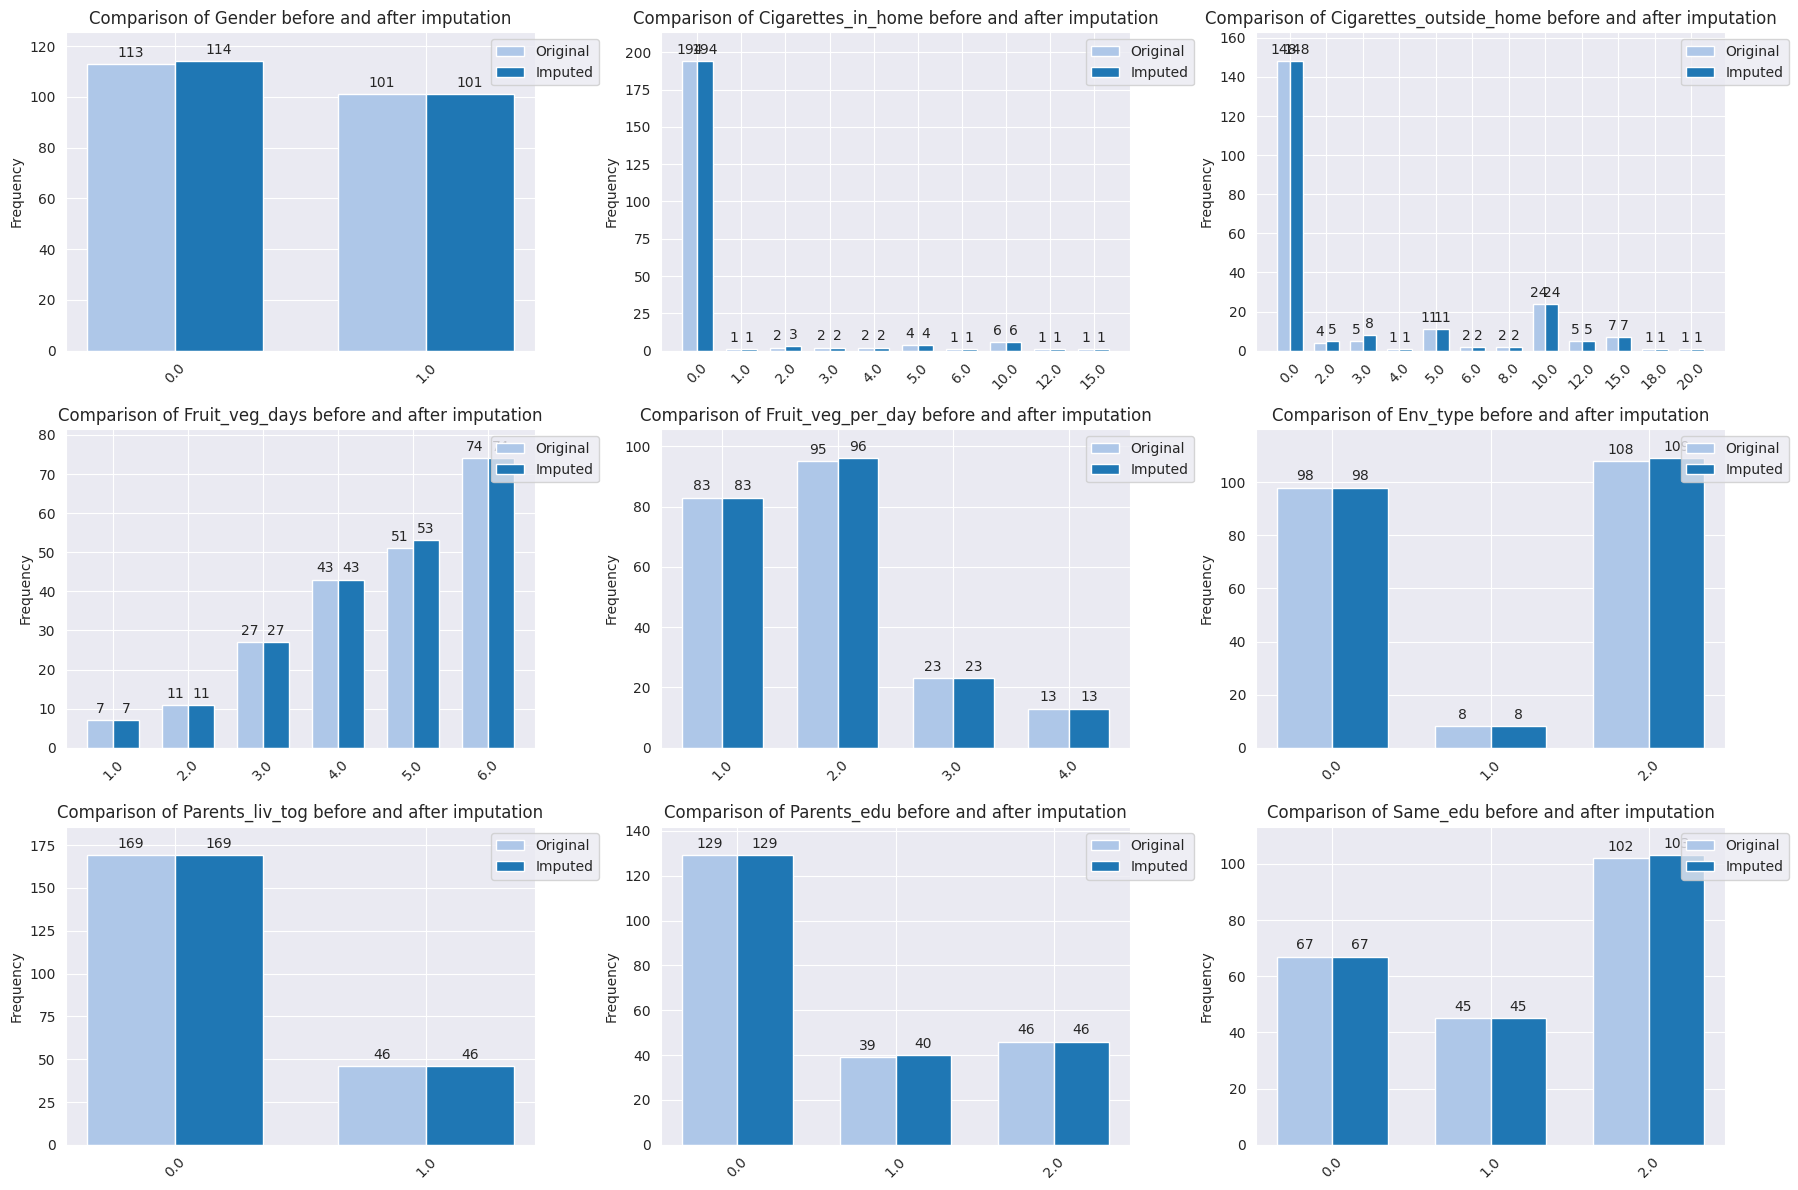

In [19]:
 # Function to compare the categorical variables before and after imputation
def compare_bar_plots(variables, metadata, metadata_imputed):
    n_plots = len(variables)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), layout='constrained')

    # Iterate over the variables and plot each one in a separate subplot
    for i, variable in enumerate(variables):
        ax = axs[i // n_cols, i % n_cols] if n_rows > 1 else axs[i % n_cols]

        df = pd.DataFrame({
            'Value': list(metadata[variable]) + list(metadata_imputed[variable]),
            'Type': ['Original'] * len(metadata[variable]) + ['Imputed'] * len(metadata_imputed[variable])
        })
        original_freq = df[df['Type'] == 'Original']['Value'].value_counts().sort_index()
        imputed_freq = df[df['Type'] == 'Imputed']['Value'].value_counts().sort_index()

        # Align the indices
        all_values = sorted(set(original_freq.index).union(set(imputed_freq.index)))
        original_freq = original_freq.reindex(all_values, fill_value=0)
        imputed_freq = imputed_freq.reindex(all_values, fill_value=0)

        x = np.arange(len(original_freq.index))

        width = 0.35  # Bar width

        # Plot the bars, add labels and title
        rects1 = ax.bar(x - width/2, original_freq, width, label='Original', color='#aec7e8')
        rects2 = ax.bar(x + width/2, imputed_freq, width, label='Imputed', color='#1f77b4')
        ax.bar_label(rects1, padding=3)
        ax.bar_label(rects2, padding=3)
        ax.set_xticks(x)
        ax.set_xticklabels(original_freq.index)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Comparison of {variable} before and after imputation')
        ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        ax.set_ylim(0, max(original_freq.max(), imputed_freq.max()) * 1.1)
        ax.tick_params(axis='x', rotation=45)

    # Remove any unused subplots
    for i in range(len(variables), n_rows * n_cols):
        ax = axs[i // n_cols, i % n_cols] if n_rows > 1 else axs[i % n_cols]
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# List of variables to compare
variables_to_compare = ['Gender', 'Cigarettes_in_home',
       'Cigarettes_outside_home', 'Fruit_veg_days', 'Fruit_veg_per_day',
       'Env_type', 'Parents_liv_tog', 'Parents_edu', 'Same_edu']

compare_bar_plots(variables_to_compare, metadata, metadata_imputed)

<ipython-input-20-9c6b3424a15c>:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


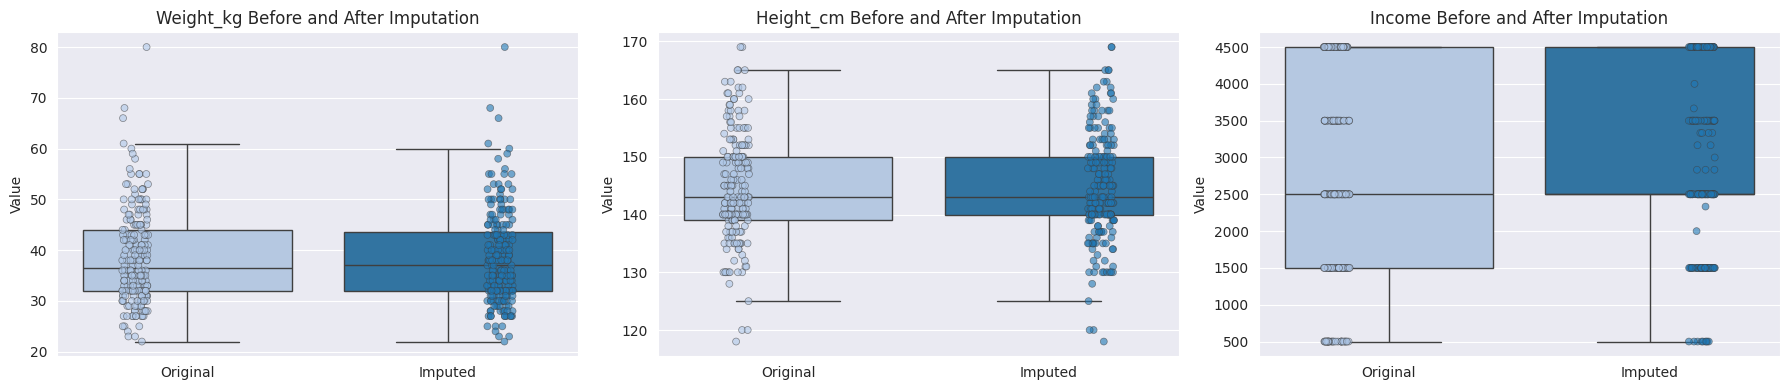

In [20]:
# Function that compares through boxplots the continuous variables before and after imputation
def grouped_boxplots(variables, metadata, metadata_imputed):
    n_plots = len(variables)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), layout='constrained')

    # Iterate over the variables and plot each one in a separate subplot
    for i, variable in enumerate(variables):
        ax = axs[i // n_cols, i % n_cols] if n_rows > 1 else axs[i % n_cols]

        df = pd.DataFrame({
            'Value': list(metadata[variable]) + list(metadata_imputed[variable]),
            'Type': ['Original'] * len(metadata[variable]) + ['Imputed'] * len(metadata_imputed[variable])
        })

        # Plot the boxplot
        sns.boxplot(x='Type', y='Value', data=df, hue='Type', palette={'Original': '#aec7e8', 'Imputed': '#1f77b4'}, showfliers=False, ax=ax)

        # Plot the sample dots
        sns.stripplot(x='Type', y='Value', data=df, hue='Type', palette={'Original': '#aec7e8', 'Imputed': '#1f77b4'},
                      dodge=True, jitter=True, ax=ax, linewidth=0.5, marker='o', alpha=0.6)

        ax.set_title(f'{variable} Before and After Imputation')
        ax.set_xlabel('')
        #ax.legend_.remove()  # Remove duplicate legend from stripplot

    # Remove any unused subplots
    for i in range(len(variables), n_rows * n_cols):
        ax = axs[i // n_cols, i % n_cols] if n_rows > 1 else axs[i % n_cols]
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# List of variables to compare
variables_to_compare = ['Weight_kg', 'Height_cm', 'Income']

grouped_boxplots(variables_to_compare, metadata, metadata_imputed)

<ipython-input-21-73c3740beab9>:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


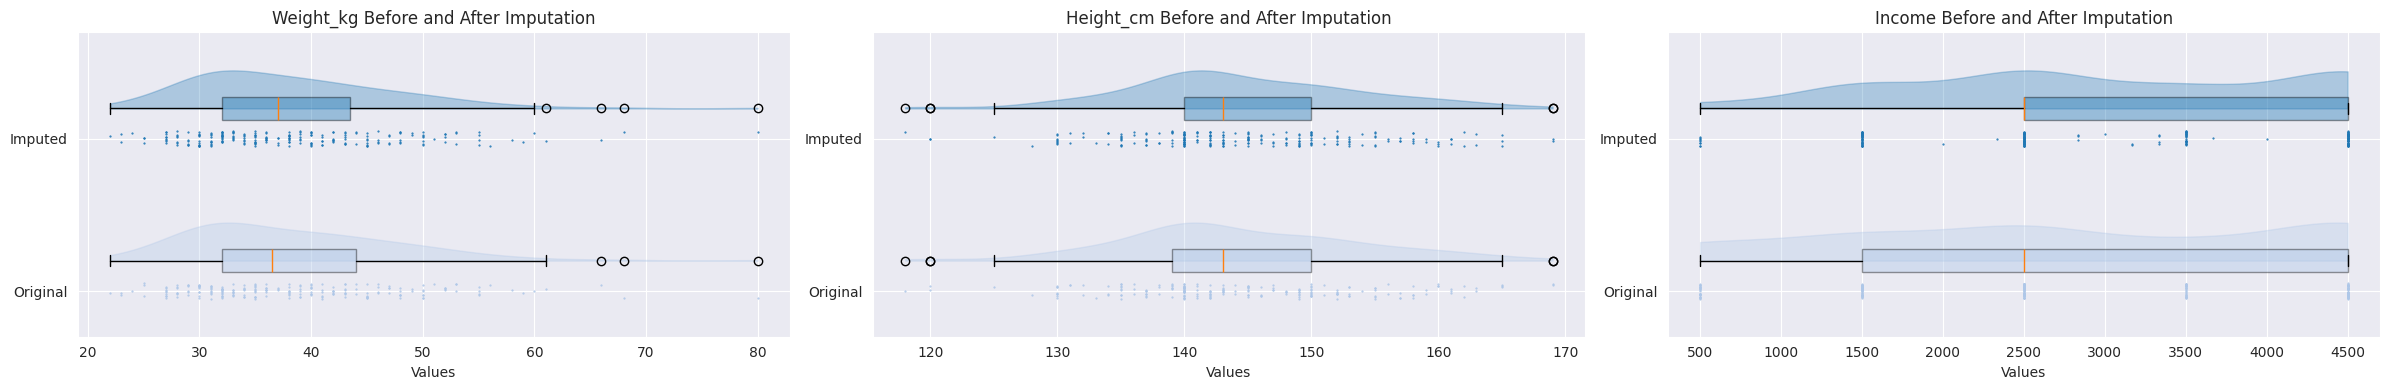

In [21]:
# Function for raincloud plots for the numerical data before and after imputation

def raincloud_plots(variables, metadata, metadata_imputed):
    n_plots = len(variables)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 4), layout='constrained')
    axs = axs.flatten()  # Flatten the array of axes to easily index it

    # Iterate over the variables and plot each one in a separate subplot
    for i, variable in enumerate(variables):
        ax = axs[i]

        original_data = metadata[variable].dropna()
        imputed_data = metadata_imputed[variable].dropna()

        data_x = [original_data, imputed_data]
        # Boxplots data
        boxplots_colors = ['#aec7e8', '#1f77b4']
        bp = ax.boxplot(data_x, patch_artist=True, vert=False)
        for patch, color in zip(bp['boxes'], boxplots_colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.4)

        # Violinplot data
        violin_colors = ['#aec7e8', '#1f77b4']
        vp = ax.violinplot(data_x, points=500,
                           showmeans=False, showextrema=False, showmedians=False, vert=False)

        for idx, b in enumerate(vp['bodies']):
            if b.get_paths():
                b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx + 1, idx + 2)
                b.set_color(violin_colors[idx])

        # Scatterplot data
        scatter_colors = ['#aec7e8', '#1f77b4']
        for idx, features in enumerate(data_x):
            y = np.full(len(features), idx + .8)
            idxs = np.arange(len(y))
            out = y.astype(float)
            out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
            y = out
            ax.scatter(features, y, s=.3, c=scatter_colors[idx])

        ax.set_title(f'{variable} Before and After Imputation')
        ax.set_xlabel('Values')
        ax.set_yticks([0.8, 1.8])
        ax.set_yticklabels(['Original', 'Imputed'])

    plt.tight_layout()
    plt.show()

# List of variables to compare
variables_to_compare = ['Weight_kg', 'Height_cm', 'Income']

raincloud_plots(variables_to_compare, metadata, metadata_imputed)


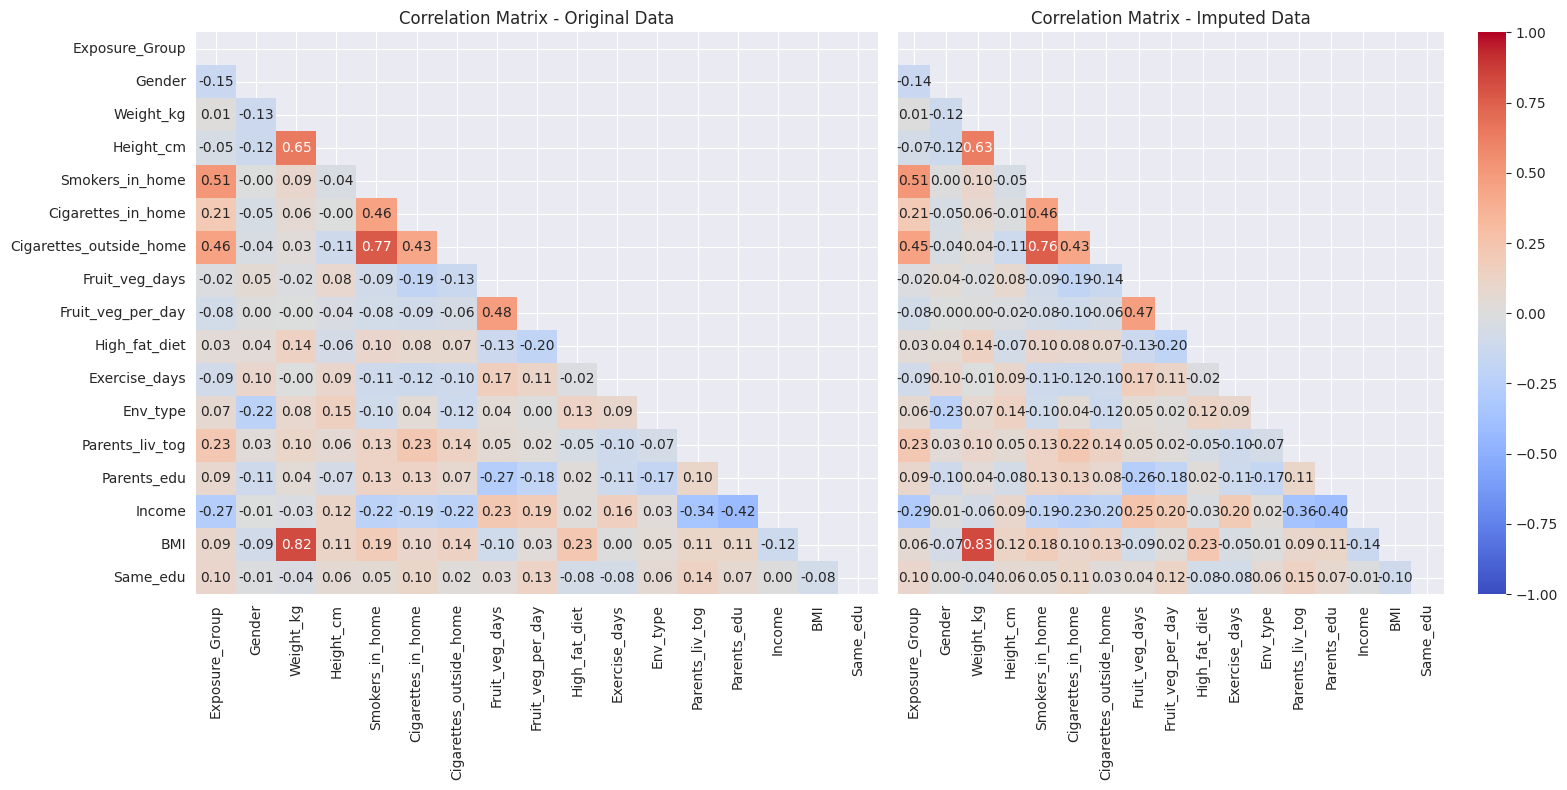

In [22]:
# Function comparing the correlation matrix before and after imputation
def plot_correlation_heatmaps(metadata, metadata_imputed):

    numeric_metadata = metadata.select_dtypes(include=[float, int])
    numeric_metadata_imputed = metadata_imputed.select_dtypes(include=[float, int])
    corr_original = numeric_metadata.corr()
    corr_imputed = numeric_metadata_imputed.corr()

    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_original, dtype=bool))

    # Plot correlation heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

    sns.heatmap(corr_original, mask=mask, ax=axes[0], cmap='coolwarm', annot=True, fmt='.2f', cbar=False, vmin=-1, vmax=1)
    axes[0].set_title('Correlation Matrix - Original Data')

    sns.heatmap(corr_imputed, mask=mask, ax=axes[1], cmap='coolwarm', annot=True, fmt='.2f', cbar=True, vmin=-1, vmax=1)
    axes[1].set_title('Correlation Matrix - Imputed Data')

    plt.tight_layout()
    plt.show()

plot_correlation_heatmaps(metadata, metadata_imputed)

In [23]:
print(metadata.isnull().sum())
print(metadata_imputed.isnull().sum())

ID                          0
Exposure_Group              0
Gender                      1
Weight_kg                   9
Height_cm                  18
Smokers_in_home             0
Cigarettes_in_home          1
Cigarettes_outside_home     4
Fruit_veg_days              2
Fruit_veg_per_day           1
High_fat_diet               0
Exercise_days               0
Env_type                    1
Parents_liv_tog             0
Parents_edu                 1
Income                      0
BMI                        20
Same_edu                    1
dtype: int64
ID                         0
Exposure_Group             0
Gender                     0
Weight_kg                  0
Height_cm                  0
Smokers_in_home            0
Cigarettes_in_home         0
Cigarettes_outside_home    0
Fruit_veg_days             0
Fruit_veg_per_day          0
High_fat_diet              0
Exercise_days              0
Env_type                   0
Parents_liv_tog            0
Parents_edu                0
Income      

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# Mapping for decoding
gender_map = {0: 'Femenino', 1: 'Masculino'}
env_type_map = {0: 'Residencial', 1: 'Rural', 2: 'Urbano'}
parents_edu_map = {0: 'High', 1: 'Low', 2: 'Medium'}
exposure_group_map = {0: 'No_TSE', 1: 'SHS', 2: 'THS', 3: 'TSE_out'}
Parents_liv_tog_map = {0: 'Casado/a, emparejado/a', 1: 'No casado'}
same_edu_map = {0: 'Diff_education', 1: 'Same_education', 2: 'Single_parent'}

# Decoding the variables
metadata_decoded = metadata_imputed.copy()
metadata_decoded['Gender'] = metadata_decoded['Gender'].map(gender_map)
metadata_decoded['Env_type'] = metadata_decoded['Env_type'].map(env_type_map)
metadata_decoded['Parents_edu'] = metadata_decoded['Parents_edu'].map(parents_edu_map)
metadata_decoded['Exposure_Group'] = metadata_decoded['Exposure_Group'].map(exposure_group_map)
metadata_decoded['Parents_liv_tog'] = metadata_decoded['Parents_liv_tog'].map(Parents_liv_tog_map)
metadata_decoded['Same_edu'] = metadata_decoded['Same_edu'].map(same_edu_map)

# Apply One-Hot Encoding for specified variables
metadata_one_hot = pd.get_dummies(metadata_decoded, columns=['Gender', 'Env_type', 'Exposure_Group', 'Parents_liv_tog', 'Same_edu'],dtype=int, drop_first=False)

# Apply Ordinal Encoding for 'Parents_edu'
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
metadata_one_hot['Parents_edu'] = ordinal_encoder.fit_transform(metadata_one_hot[['Parents_edu']])

# Display and save the final DataFrame with one-hot and ordinal encoding
print(metadata_one_hot.columns)
metadata_one_hot.to_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/metadata_one_hot_D1_1.xlsx', index=False)


Index(['ID', 'Weight_kg', 'Height_cm', 'Smokers_in_home', 'Cigarettes_in_home',
       'Cigarettes_outside_home', 'Fruit_veg_days', 'Fruit_veg_per_day',
       'High_fat_diet', 'Exercise_days', 'Parents_edu', 'Income', 'BMI',
       'Gender_Femenino', 'Gender_Masculino', 'Env_type_Residencial',
       'Env_type_Rural', 'Env_type_Urbano', 'Exposure_Group_No_TSE',
       'Exposure_Group_SHS', 'Exposure_Group_THS', 'Exposure_Group_TSE_out',
       'Parents_liv_tog_Casado/a, emparejado/a', 'Parents_liv_tog_No casado',
       'Same_edu_Diff_education', 'Same_edu_Same_education',
       'Same_edu_Single_parent'],
      dtype='object')


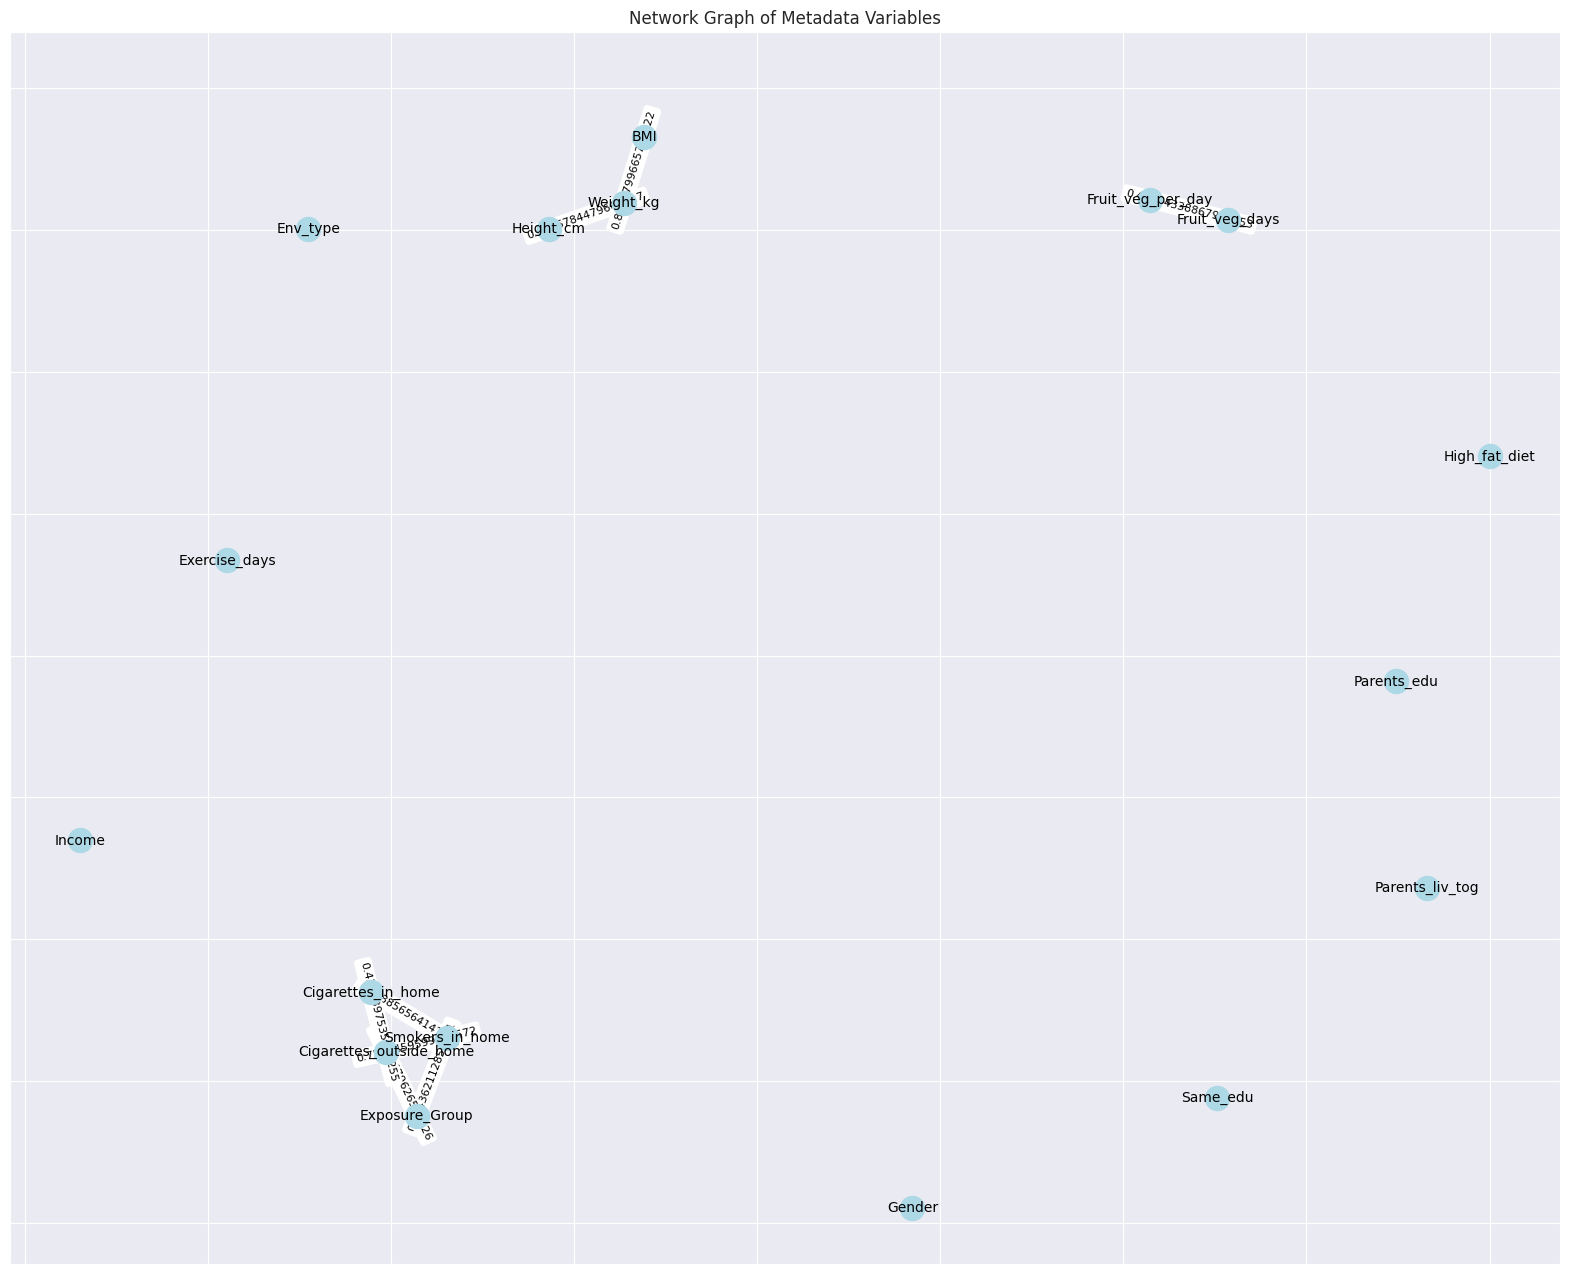

In [26]:
# Plotting a Mixed Graphical Model
import networkx as nx
import matplotlib.pyplot as plt

# EMpty graphic
G = nx.Graph()

# One node for each variable desired
for variable in metadata_imputed.columns.drop('ID'):
    G.add_node(variable)

# Connection between nodes
for i in range(len(metadata_imputed.columns.drop('ID'))):
    for j in range(i+1, len(metadata_imputed.columns.drop('ID'))):
        variable1 = metadata_imputed.columns.drop('ID')[i]
        variable2 = metadata_imputed.columns.drop('ID')[j]
        correlation = metadata_imputed[variable1].corr(metadata_imputed[variable2])
        if correlation > 0.4:  # Connection if correlation over 0.4
            G.add_edge(variable1, variable2, weight=correlation)


plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
plt.title('Network Graph of Metadata Variables')
plt.show()

In [27]:
import folium

# Create the map centered on Tarragona
m = folium.Map(location=[41.1167, 1.2500], zoom_start=12)

# List of locations and corresponding info
locations = [
    [41.1217743403221, 1.2576781965684256],  # Sant Pau Apostol school
    [41.12363848110154, 1.1930569388977765],  # Sant Joan XXIII school
    [41.19141747412059, 1.204677825406875]    # Ventura Gassol school
]

infos = [
    "<b>Sant Pau Apostol school:</b> <br>85 children <br>(47 girls, 37 boys)",  # Sant Pau Apostol school
    "<b>Sant Joan XXIII school:</b> <br>56 children <br>(33 girls, 23 boys)",  # Sant Joan XXIII school
    "<b>Ventura Gassol school:</b> <br>74 children <br>(33 girls, 41 boys)"  # Ventura Gassol school
]


# Add markers with tooltips (visible on hover)
for location, info in zip(locations, infos):
    folium.Marker(location=location, tooltip=info).add_to(m)

# Add DivIcons with nicely formatted text for each location
for location, info in zip(locations, infos):
    folium.Marker(
        location=location,
        icon=folium.DivIcon(
            html=f'''
                <div style="
    font-size: 12px;
    font-weight: bold;
    text-align: center;
    background-color: white;
    padding: 8px 15px;
    border: 1px solid black;
    border-radius: 3px;
    box-shadow: 2px 2px 4px rgba(0,0,0,0.3);
    width: 200px;
    line-height: 1.5;
    white-space: normal;">
    {info}
</div>

            '''
        )
    ).add_to(m)

m
#m.save('school_map.html')
